### Задание ...

In [1]:
# Ф-я активации - сигмоида

import numpy as np
def sigmoid(x):
    # ф-я активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

In [2]:
# 1
import numpy as np
class OurNeuralNetwork1:
    '''
    Данные нейросети:
        - три входа
        - три нейрона в скрытых слоях (h1, h2, h3)
        - выход (o1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0.5, 0.5, 0.5]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        
        # Входы для o1 - это выходы h1, h2, h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork1()
x = np.array([0, 10, 100])
print(network.feedforward(x))

0.8175744761936437


Изобразим на графе

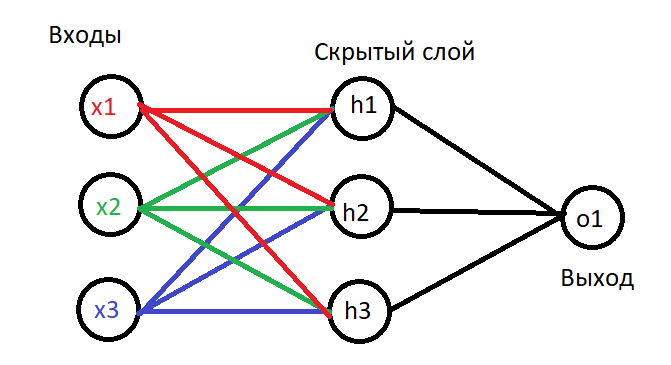

In [3]:
# 2
import numpy as np
class OurNeuralNetwork2:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - два выхода (o1, o2)
    Нейроны имеют идентичные веса и пороги:
        - w = [1, 0]
        - b = 1
    '''
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        # Вход для o1 - это выход h1, h2
        # Вход для o2 - это выход h1, h2
        # o1 = o2
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

network = OurNeuralNetwork2()
x = np.array([0, 10])
print(network.feedforward(x))

(0.8495477739862124, 0.8495477739862124)


Изобразим на графе
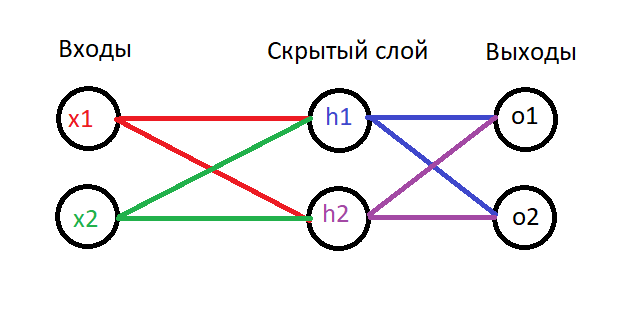

### Задание ...
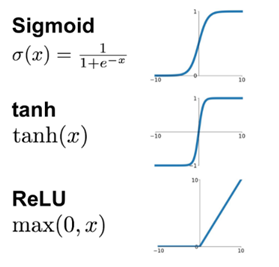

In [11]:
import numpy as np
# Ф-ии активаций и их производные

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - tanh(x)**2

def ReLU(x):
    return max(0, x)

def ReLU_derivative(x):
    if x > 0:
        return 1
    if x < 0:
        return 0
    
# Классы нейронов для каждой ф-ии    
class Neuron_sigmoid:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
class Neuron_tanh:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
    
class Neuron_ReLU:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

output:
 [[0.0037259 ]
 [0.997381  ]
 [0.00212198]
 [0.99739795]]
last loss:  3.201493224593766e-05
min loss:  3.201493224593766e-05


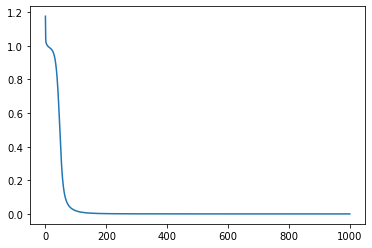

In [12]:
import matplotlib.pyplot as plt

# расчёт потерь
def loss_calc(y_hat, y):
    return ((y_hat - y)**2).sum()

loss_values = []

class NeuralNetwork_sigmoid:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output),
                                                  self.weights2.T) * sigmoid.derivative(self.layer1)))
        
        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],[1],[0],[1]])

net_sigmoid = NeuralNetwork(X,y)
for i in range(1000):
    net_sigmoid.feedforward()
    net_sigmoid.backprop()
    loss_values.append(loss_calc(net_sigmoid.output, y))
print("output:\n", net_sigmoid.output)
print("last loss: ", loss_values[-1])
print("min loss: ", min(loss_values))
plt.plot(loss_values)

output:
 [[0.0039571 ]
 [0.99753494]
 [0.00202614]
 [0.9975061 ]]
last loss:  3.205997936689188e-05
min loss:  3.205997936689188e-05


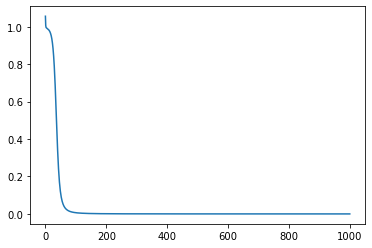

In [13]:
import matplotlib.pyplot as plt

# расчёт потерь
def loss_calc(y_hat, y):
    return ((y_hat - y)**2).sum()

loss_values = []

class NeuralNetwork_tanh:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * tanh_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * tanh_derivative(self.output),
                                                  self.weights2.T) * tanh.derivative(self.layer1)))
        
        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],[1],[0],[1]])

net_tanh = NeuralNetwork(X,y)
for i in range(1000):
    net_tanh.feedforward()
    net_tanh.backprop()
    loss_values.append(loss_calc(net_tanh.output, y))
print("output:\n", net_tanh.output)
print("last loss: ", loss_values[-1])
print("min loss: ", min(loss_values))
plt.plot(loss_values)

output:
 [[0.00398506]
 [0.9975919 ]
 [0.0019745 ]
 [0.99756596]]
last loss:  3.1502817118906206e-05
min loss:  3.1502817118906206e-05


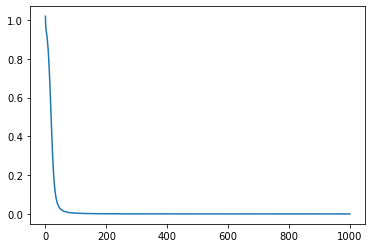

In [14]:
import matplotlib.pyplot as plt

# расчёт потерь
def loss_calc(y_hat, y):
    return ((y_hat - y)**2).sum()

loss_values = []

class NeuralNetwork_ReLU:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = ReLU(np.dot(self.input, self.weights1))
        self.output = ReLU(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * ReLU_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * ReLU_derivative(self.output),
                                                  self.weights2.T) * ReLU.derivative(self.layer1)))
        
        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],[1],[0],[1]])

net_ReLU = NeuralNetwork(X,y)
for i in range(1000):
    net_ReLU.feedforward()
    net_ReLU.backprop()
    loss_values.append(loss_calc(net_ReLU.output, y))
print("output:\n", net_ReLU.output)
print("last loss: ", loss_values[-1])
print("min loss: ", min(loss_values))
plt.plot(loss_values)

### Задание ...

In [4]:
# Classification
import pandas as pd

In [5]:
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, 
                                    test_size=0.2, random_state=123)

In [8]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123, max_iter=15000) # без параметра max_iter - ConvergenceWarning
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(max_iter=15000, random_state=123)

In [9]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15].values)

# Метод Score для оценки точности моделей классификации
print("Test Accuracy: %.3f"%mlp_classifier.score(X_test, Y_test))
print("Training Accuracy: %.3f"%mlp_classifier.score(X_train, Y_train))

['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica']
['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica']
Test Accuracy: 0.967
Training Accuracy: 0.983


In [10]:
# Regression
data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
X = data["YearsExperience"].values.reshape(-1, 1)
y = data['Salary'].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, 
                                    test_size=0.2, random_state=123)

In [13]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123, max_iter=100000) 
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(max_iter=100000, random_state=123)

In [15]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

# Метод Score оценивает точность моделей классификации
print("Test R^2 Score: %.3f"%mlp_regressor.score(X_test, Y_test))
print("Training R^2 Score: %.3f"%mlp_regressor.score(X_train, Y_train))

# max_iter = 200:

# [20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
# [ 54445. 121872.  56642. 116969.  64445. 112635.]
# Test R^2 Score: -8.796
# Training R^2 Score: -8.261

# Если R2 < 0 - разработанная модель даёт прогноз даже хуже, чем простое усреднение

[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R^2 Score: 0.971
Training R^2 Score: 0.948


In [16]:
print("Loss: ", mlp_regressor.loss_)
print("Number of Coefs: ", len(mlp_regressor.coefs_))
print("Number of Intercepts: ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_regressor.out_activation_)

Loss:  16873681.689960096
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  30344
Name of Output Layer Activation Function:  identity


In [14]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
